## TASK 2

In [95]:
#Importation of the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import mode
import datetime
from scipy.stats import ttest_ind
import matplotlib.cm as cm

### Understanding the structure of each data set provided


In [5]:
#loading the data into python
Task2=pd.read_csv('C:/Users/jennifer.okeke/Downloads/Final_Challenge/QVI_data.csv')

In [6]:
print(Task2.columns)

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')


In [7]:
#Rename specific columns
Task2.rename(columns={'DATE': 'Date', 'STORE_NBR': 'Store_Number', 'LYLTY_CARD_NBR': 'Customer_Card_Number', 'TXN_ID': 'Purchase_ID', 'PROD_NBR': 'Product_Number', 'PROD_NAME': 'Product_Name',  'PROD_QTY': 'Production_Quantity', 'TOT_SALES': 'Total_Sales($)', 'PACK_SIZE': 'Packet_Size', 'BRAND':'Brand','LIFESTAGE':'LifeStage', 'PREMIUM_CUSTOMER':'Purchase_Plan'}, inplace=True)


In [24]:
#Get information about the columns and data types
print(Task2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_Card_Number  264834 non-null  int64  
 1   Date                  264834 non-null  object 
 2   Store_Number          264834 non-null  int64  
 3   Purchase_ID           264834 non-null  int64  
 4   Product_Number        264834 non-null  int64  
 5   Product_Name          264834 non-null  object 
 6   Production_Quantity   264834 non-null  int64  
 7   Total_Sales($)        264834 non-null  float64
 8   Packet_Size           264834 non-null  int64  
 9   Brand                 264834 non-null  object 
 10  LifeStage             264834 non-null  object 
 11  Purchase_Plan         264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB
None


In [8]:
#See the first few rows of the DataFrame
print(Task2.head())

   Customer_Card_Number        Date  Store_Number  Purchase_ID  \
0                  1000  2018-10-17             1            1   
1                  1002  2018-09-16             1            2   
2                  1003  2019-03-07             1            3   
3                  1003  2019-03-08             1            4   
4                  1004  2018-11-02             1            5   

   Product_Number                            Product_Name  \
0               5  Natural Chip        Compny SeaSalt175g   
1              58   Red Rock Deli Chikn&Garlic Aioli 150g   
2              52   Grain Waves Sour    Cream&Chives 210G   
3             106  Natural ChipCo      Hony Soy Chckn175g   
4              96          WW Original Stacked Chips 160g   

   Production_Quantity  Total_Sales($)  Packet_Size       Brand  \
0                    2             6.0          175     NATURAL   
1                    1             2.7          150         RRD   
2                    1             

In [10]:
#Get the number of rows and columns
num_rows = Task2.shape[0]
num_cols = Task2.shape[1]

#Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 264834
Number of columns: 12


In [11]:
#Count the number of missing values in each column
print(Task2.isnull().sum())

Customer_Card_Number    0
Date                    0
Store_Number            0
Purchase_ID             0
Product_Number          0
Product_Name            0
Production_Quantity     0
Total_Sales($)          0
Packet_Size             0
Brand                   0
LifeStage               0
Purchase_Plan           0
dtype: int64


In [12]:
#Count the number of missing values in each column
print(Task2.notnull().sum())

Customer_Card_Number    264834
Date                    264834
Store_Number            264834
Purchase_ID             264834
Product_Number          264834
Product_Name            264834
Production_Quantity     264834
Total_Sales($)          264834
Packet_Size             264834
Brand                   264834
LifeStage               264834
Purchase_Plan           264834
dtype: int64


### Determining Control Stores

In [38]:
#To find control store stores, we need to first find the Total sales from each store-
total_sales_by_store = Task2.groupby('Store_Number')['Total_Sales($)'].sum()
print(total_sales_by_store)

Store_Number
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: Total_Sales($), Length: 272, dtype: float64


In [56]:
#customer count for each store
total_sales_by_store = Task2.groupby('Store_Number')['Customer_Card_Number'].sum()
print(total_sales_by_store)

Store_Number
1         720905
2        1135736
3        4779490
4        7025622
5        6964664
         ...    
268    146463848
269    432483003
270    440291831
271    375501918
272    153249277
Name: Customer_Card_Number, Length: 272, dtype: int64


In [58]:
#average sales from each store
total_sales_by_store = Task2.groupby('Store_Number')['Total_Sales($)'].mean()
print(round(total_sales_by_store))

Store_Number
1      4.0
2      4.0
3      9.0
4      9.0
5      7.0
      ... 
268    5.0
269    7.0
270    7.0
271    7.0
272    8.0
Name: Total_Sales($), Length: 272, dtype: float64


In [60]:
# Change the data type of Store_Number to string
Task2['Store_Number'] =Task2['Store_Number'].astype(str)


In [73]:
#Finding the control store based on the sales share for the total sales of each store.
# Calculate total sales for each store
total_sales_by_store = Task2.groupby('Store_Number')['Total_Sales($)'].sum()

# Calculate sales share for each store
sales_share_by_store = total_sales_by_store / total_sales_by_store.sum()

# Print the sales share for each store
print("Sales Share by Store:")
print(sales_share_by_store)

Sales Share by Store:
Store_Number
1      0.001238
10     0.005329
100    0.006120
101    0.005213
102    0.005401
         ...   
95     0.007198
96     0.002269
97     0.005396
98     0.000822
99     0.000115
Name: Total_Sales($), Length: 272, dtype: float64


In [77]:
#Then finding the store which had the most frequency in terms of share to serve as the control store.
# Calculate total sales for each store
total_sales_by_store = Task2.groupby('Store_Number')['Total_Sales($)'].sum()

# Calculate sales share for each store
sales_share_by_store = total_sales_by_store / total_sales_by_store.sum()

# Find the median of sales share
median_sales_share = sales_share_by_store.median()

# Find the difference between sales share and median sales share
difference_from_median = abs(sales_share_by_store - median_sales_share)

# Find the store(s) with the sales share closest to the median
stores_with_closest_sales_share = difference_from_median[difference_from_median == difference_from_median.min()].index.tolist()

# Print the median sales share and the corresponding store(s)
print("Median Sales Share:")
print(median_sales_share)
print("Store(s) with Closest Sales Share to Median:")
print(stores_with_closest_sales_share)

Median Sales Share:
0.0030896377090861124
Store(s) with Closest Sales Share to Median:
['202', '246']


In [67]:
store_numbers = Task2['Store_Number'].unique()
print(store_numbers)


['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '155' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' '178' '179' '180' '181' '182' '1

##  Comparing performance of the control store and trial store

Comparison between Store 77 and Store 86
Sales Difference:  -7595.35
Sales Ratio ( 77 / 86 ):  0.28583920604399476

Comparison between Store 77 and Store 88
Sales Difference:  -13293.25
Sales Ratio ( 77 / 88 ):  0.1861233985887683

Comparison between Store 77 and Store 202
Sales Difference:  -2951.05
Sales Ratio ( 77 / 202 ):  0.5074235734971332

Comparison between Store 77 and Store 246
Sales Difference:  -2914.2
Sales Ratio ( 77 / 246 ):  0.5105639716502637

Comparison between Store 86 and Store 88
Sales Difference:  -5697.9
Sales Ratio ( 86 / 88 ):  0.6511471997306109

Comparison between Store 86 and Store 202
Sales Difference:  4644.3
Sales Ratio ( 86 / 202 ):  1.7752063494712946

Comparison between Store 86 and Store 246
Sales Difference:  4681.150000000001
Sales Ratio ( 86 / 246 ):  1.7861929394377078

Comparison between Store 88 and Store 202
Sales Difference:  10342.2
Sales Ratio ( 88 / 202 ):  2.7262750269151486

Comparison between Store 88 and Store 246
Sales Difference:  103

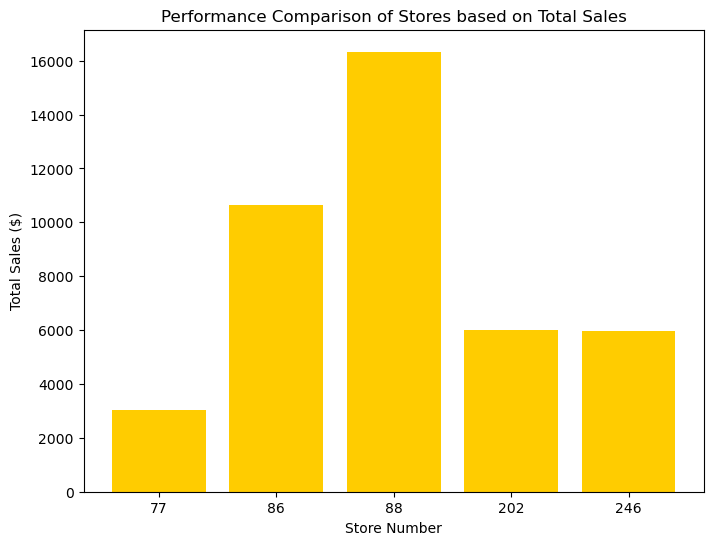

In [103]:
# Let's compare the performances of stores
store_numbers = ['77', '86', '88', '202', '246']

# Calculate the total sales for each store
total_sales = Task2.groupby('Store_Number')['Total_Sales($)'].sum()

# Compare the performances of the stores pairwise
for i in range(len(store_numbers)):
    for j in range(i+1, len(store_numbers)):
        store1 = store_numbers[i]
        store2 = store_numbers[j]
        sales_difference = total_sales[store1] - total_sales[store2]
        sales_ratio = total_sales[store1] / total_sales[store2]
        print("Comparison between Store", store1, "and Store", store2)
        print("Sales Difference: ", sales_difference)
        print("Sales Ratio (", store1, "/", store2, "): ", sales_ratio)
        print()
        
# Create a bar chart to compare total sales of the stores
plt.figure(figsize=(8, 6))
plt.bar(store_numbers, total_sales[store_numbers], color=(1.0, 0.8, 0.0))
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')
plt.title('Performance Comparison of Stores based on Total Sales')
plt.show()

#From this we can conclude that the trial store are doing well than our control stores.

In [84]:
#Checking based on monthly sales- firstly, we haveto convert date to datetime format
Task2['Date'] = pd.to_datetime(Task2['Date'])

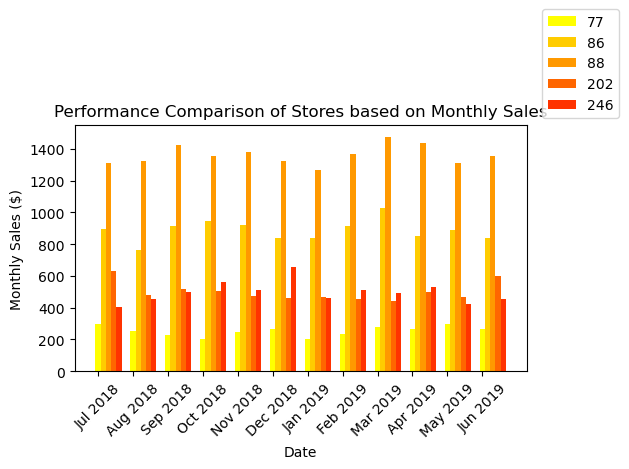

In [111]:
#Checking based on monthly sales
store_numbers = ['77', '86', '88', '202', '246']


# Convert 'Date' column to datetime format
Task2['Date'] = pd.to_datetime(Task2['Date'])

# Filter the data for the selected stores
selected_stores = Task2[Task2['Store_Number'].isin(store_numbers)]

# Group the data by store and date, and calculate the monthly sales
monthly_sales = selected_stores.groupby(['Store_Number', pd.Grouper(key='Date', freq='M')])['Total_Sales($)'].sum().reset_index()

# Get unique months for x-axis labels
months = monthly_sales['Date'].dt.strftime('%b %Y').unique()

# Create a custom colormap with varying shades of yellow
colors = ['#FFFF00', '#FFCC00', '#FF9900', '#FF6600', '#FF3300']

# Create the x-axis positions for the bars
x_positions = np.arange(len(months))

# Set the width of each bar
bar_width = 0.15

# Plot the bars for each store
for i, store_number in enumerate(store_numbers):
    store_data = monthly_sales[monthly_sales['Store_Number'] == store_number]
    plt.bar(x_positions + (i * bar_width), store_data['Total_Sales($)'], bar_width, label=store_number, color=colors[i])

# Set the x-axis labels and tick positions
plt.xlabel('Date')
plt.ylabel('Monthly Sales ($)')
plt.title('Performance Comparison of Stores based on Monthly Sales')
plt.xticks(x_positions, months, rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left')
plt.tight_layout()

# Show the bar chart
plt.show()

#based on monthly sales the trial store that seems not be meeting up is store 77

In [93]:
# Export the DataFrame to an CSV file
Task2.to_csv('C:/Users/jennifer.okeke/Downloads/DASL/TASK2.csv', index=False)